In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_og = pd.read_csv('data/npm.csv')
data_og.rename(columns = {'Dependenats':'Dependents','Abondoned':'Abandoned','GitHub Star':'GitHub Stars'}, inplace = True)

In [3]:
npm = data_og
npm.describe()

,GitHub Stars,GitHub Forks,GitHub Watchers,Code Coverage %,Linters,Dependents,NPM Stars,Maintainers,Contributors,Dependencies,Total Issues,Open Issues,Security Advisories
count,9787.000000,9787.000000,9787.000000,1941.000000,9787.000000,9782.000000,9782.000000,9787.000000,9787.000000,9787.000000,9133.000000,9581.000000,9787.000000
mean,2697.514969,702.143864,132.744048,0.861458,0.908961,340.032611,14.596810,2.495964,1.322060,3.407990,489.361875,41.535957,1.316542
std,11443.887065,6741.811629,1359.604076,0.233112,0.989103,2243.673670,63.837118,4.994976,15.337463,6.475408,1928.794511,155.539347,4.882278
min,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,4.000000,2.000000,0.870000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000
50%,78.000000,18.000000,7.000000,0.960000,1.000000,32.000000,2.000000,1.000000,0.000000,2.000000,35.000000,5.000000,0.000000
75%,503.000000,86.000000,22.000000,1.000000,2.000000,128.000000,9.000000,2.000000,0.000000,4.000000,151.000000,19.000000,0.000000
max,190694.000000,178621.000000,36193.000000,1.000000,5.000000,102292.000000,2577.000000,222.000000,952.000000,143.000000,42674.000000,5673.000000,87.000000


# Which packages are the most popular?
Popularity is measured by dependents: More times used, more popular. Makes sense to me

In [4]:
pop = most_ds = npm.groupby('Dependency Name')['Dependents'].agg(sum)
pop = pop.sort_values(ascending=False).head(40)
pop

Dependency Name
lodash              102292.0
chalk                66277.0
react                57239.0
commander            52162.0
axios                47805.0
express              45953.0
vue                  43758.0
request              40898.0
react-dom            40285.0
fs-extra             38385.0
moment               34369.0
core-js              33770.0
debug                31853.0
inquirer             27940.0
async                24376.0
uuid                 23981.0
yargs                22509.0
classnames           21040.0
typescript           20563.0
bluebird             20007.0
glob                 19491.0
webpack              19377.0
rxjs                 18279.0
underscore           18179.0
mkdirp               17883.0
node-fetch           17074.0
colors               16282.0
semver               15822.0
minimist             15721.0
dotenv               15134.0
body-parser          14967.0
jquery               14662.0
ora                  13993.0
eslint               13016.

# Which popular packages have the most dependencies themselves?

In [5]:
# most_ds = npm.groupby('Dependency Name')['Dependencies'].agg(sum)
# most_ds = most_ds.sort_values(ascending=False)
# most_ds.head(20)

pep = npm.groupby('Dependency Name')['Dependencies','Dependents'].agg(sum)
pep = pep.sort_values(ascending=False,by='Dependents').head(40)
pep = pep.sort_values(ascending=False,by='Dependencies')
pep.head(25)

C:\Users\jliu8\AppData\Local\Temp\ipykernel_4788\2103765543.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pep = npm.groupby('Dependency Name')['Dependencies','Dependents'].agg(sum)


,Dependencies,Dependents
Dependency Name,,
eslint,38,13016.0
express,30,45953.0
webpack,24,19377.0
request,20,40898.0
inquirer,14,27940.0
yeoman-generator,12,11499.0
jsonwebtoken,10,11698.0
body-parser,10,14967.0
ora,9,13993.0


**How is our good friend is-number?**


In [6]:
npm[npm['Dependency Name'] == 'is-number']

,Dependency Name,Repository,GitHub Stars,GitHub Forks,GitHub Watchers,Abandoned,Code Coverage %,Linters,Dependents,NPM Stars,Maintainers,Contributors,Dependencies,License,Total Issues,Open Issues,Security Advisories
1984,is-number,https://github.com/jonschlinkert/is-number,185,34,8,False,NaN,2,503.0,13.0,3,3,0,MIT,29.0,5.0,0


# GH Stars and NPM Stars

Do some packages have more GH stars or more NPM stars? Or is it a linear relationship?

In [7]:
gh = npm.groupby('Dependency Name')['GitHub Stars','NPM Stars'].agg(sum)
gh = gh.sort_values(ascending=False,by='NPM Stars')
gh.head(15)

C:\Users\jliu8\AppData\Local\Temp\ipykernel_4788\2311847212.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gh = npm.groupby('Dependency Name')['GitHub Stars','NPM Stars'].agg(sum)


,GitHub Stars,NPM Stars
Dependency Name,,
express,55100,2577.0
lodash,51471,1520.0
request,25400,1502.0
gulp,32398,1425.0
async,27378,1210.0
pm2,35775,1061.0
moment,46134,1034.0
commander,21455,1019.0
chalk,17417,942.0


Seems most popular packages have more GH stars always than NPM stars. But the relationship is not linear...

<AxesSubplot:xlabel='Dependency Name'>

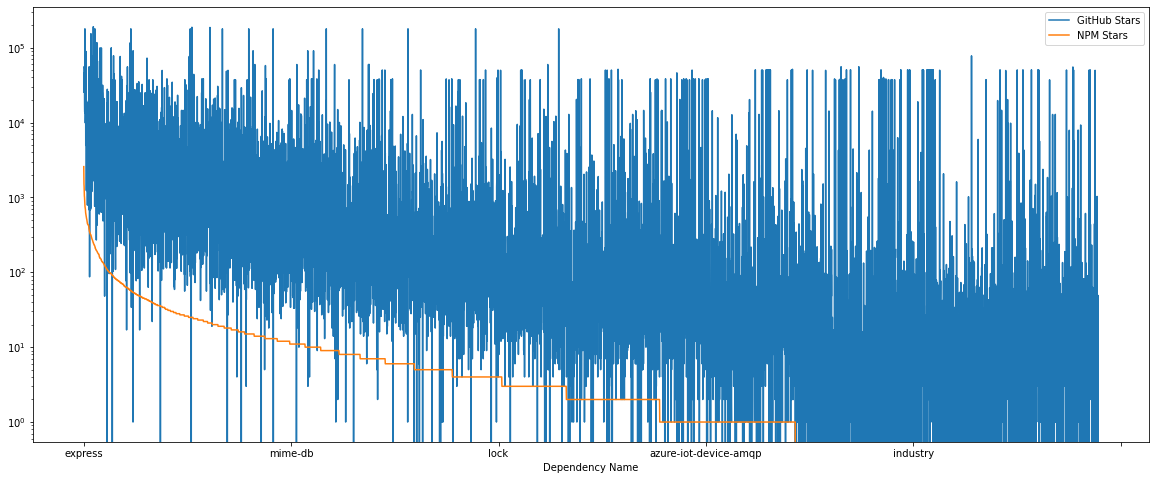

In [8]:
gh.plot(figsize=(20,8),logy=True)

I guess there is a relationship... but the only thing for sure is that NPM stars are only there for the most popular projects because nobody has NPM accounts.

# Most Depended-On Abandoned Packages

In [9]:
abandoned = npm[npm['Abandoned']==True].groupby('Dependency Name')['Dependents','Security Advisories'].agg(sum).sort_values(ascending=False,by='Dependents')
abandoned.head(20)

C:\Users\jliu8\AppData\Local\Temp\ipykernel_4788\3608945904.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  abandoned = npm[npm['Abandoned']==True].groupby('Dependency Name')['Dependents','Security Advisories'].agg(sum).sort_values(ascending=False,by='Dependents')


,Dependents,Security Advisories
Dependency Name,,
bcrypt-nodejs,548.0,0
gulp-cssnano,221.0,4
gulp-cssmin,187.0,3
babel-preset-react-hmre,161.0,0
union-class-names,155.0,0
scss-loader,126.0,0
ripple-lib,125.0,0
type-of,125.0,0
request-json,112.0,0


bcrypt-nodejs seems to be a password hasher, so I tried to see the repository itself for more information... and got 404'd.    
How did this dataset get the info, then??

In [10]:
npm[npm['Dependency Name'] == 'bcrypt-nodejs']

,Dependency Name,Repository,GitHub Stars,GitHub Forks,GitHub Watchers,Abandoned,Code Coverage %,Linters,Dependents,NPM Stars,Maintainers,Contributors,Dependencies,License,Total Issues,Open Issues,Security Advisories
964,bcrypt-nodejs,https://github.com/shaneGirish/bcryptJS,-1,-1,-1,True,NaN,0,548.0,110.0,2,3,0,NaN,NaN,NaN,0


Oh... it didn't. But the dependents number DOES match the figure on the npm page.

# Vulnerabilities in abandoned / not abandoned packages
Of course the data is only the 10k most popular so this may be skewed a bit    

In [ ]:
ababa =  pd.pivot_table(npm, values='Security Advisories', index=["Abandoned"], columns=["Linters"])
ababa

Okay, makes sense
Wait, is this an average? I think so